In [12]:
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

In [3]:
data_path = "/home/jenno/data/data/MSCOCO2017"
csv_path = os.path.join(data_path, "val_object_caption.csv")

In [8]:
df = pd.read_csv(csv_path)
data = df.to_dict('list')
print(data.keys())

dict_keys(['image', 'num_obj', 'x1', 'y1', 'x2', 'y2', 'obj_label', 'obj_mask', 'caption'])


In [21]:
def show_data(data, idx):
    has_object = "num_obj" in data
    has_caption = "caption" in data
    #first let's get the image
    idx_data = {}
    for key in data:
        idx_data[key] = data[key][idx]
    print(idx_data)
    image = cv2.imread(os.path.join(data_path, idx_data["image"]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    

{'image': 'val2017/000000305609.jpg', 'num_obj': 12, 'x1': '[1.18, 364.0, 300.31, 516.64, 343.23, 16.54, 294.97, 591.62, 337.51, 206.88, 109.09, 236.9]', 'y1': '[159.67, 285.85, 136.09, 110.69, 53.0, 353.55, 2.07, 321.21, 109.22, 264.25, 280.55, 379.57]', 'x2': '[612.0, 499.0, 448.11, 612.0, 364.03000000000003, 206.76, 612.0, 611.39, 451.65, 264.85, 140.06, 407.33000000000004]', 'y2': '[604.76, 462.85, 191.98000000000002, 211.68, 147.84, 498.28, 157.82, 343.08, 170.43, 367.58, 396.25, 553.34]', 'obj_label': '[67, 54, 54, 48, 50, 51, 1, 49, 51, 44, 50, 54]', 'obj_mask': 'mask_val2017/000000305609.jpg', 'caption': "['a table with many plates of food on top', 'A table that has several plates of breakfast food on it.', 'A table is covered in breakfast foods at a Waffle House.', 'A table full of plates of breakfast food.', 'Various plates of food that include hashbrowns, waffles and grits.']"}


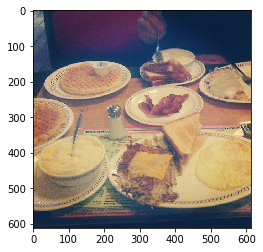

In [22]:
show_data(data, 3)